# Decision Trees and Random Forests in Python

In [1]:
import pandas as pd 
import numpy as np 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read data 
nettrain = pd.read_csv("C:\\Users\\Aesha1\\Desktop\\pythonproject\\pythonnetworktrain.csv")
nettest = pd.read_csv("C:\\Users\\Aesha1\\Desktop\\pythonproject\\pythonnetworktest.csv")

In [3]:
#merge dataframes
all=pd.concat([nettrain,nettest],axis=0)
all.reset_index(inplace=True,drop=True)

In [4]:
#Check structure of data
all.shape

(47736, 42)

In [5]:
all.head()

,class,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,...,serror_rate,service,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
0,normal,2,0.00,0,150,0.03,0.05,0.17,0.17,0.00,...,0.0,ftp_data,491,2,0.00,0.0,0.0,0,0,0
1,normal,13,0.15,0,255,0.60,0.00,0.88,0.00,0.00,...,0.0,other,146,1,0.00,0.0,0.0,0,0,0
2,anomaly,123,0.07,0,255,0.05,0.00,0.00,0.10,1.00,...,1.0,private,0,6,0.00,0.0,1.0,0,0,0
3,normal,5,0.00,8153,30,0.00,0.00,0.03,1.00,0.03,...,0.2,http,232,5,0.00,0.0,0.2,0,0,0
4,normal,30,0.00,420,255,0.00,0.00,0.00,1.00,0.00,...,0.0,http,199,32,0.09,0.0,0.0,0,0,0


In [6]:
#Check information of data.
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47736 entries, 0 to 47735
Data columns (total 42 columns):
class                          25192 non-null object
count                          47736 non-null int64
diff_srv_rate                  47736 non-null float64
dst_bytes                      47736 non-null int64
dst_host_count                 47736 non-null int64
dst_host_diff_srv_rate         47736 non-null float64
dst_host_rerror_rate           47736 non-null float64
dst_host_same_src_port_rate    47736 non-null float64
dst_host_same_srv_rate         47736 non-null float64
dst_host_serror_rate           47736 non-null float64
dst_host_srv_count             47736 non-null int64
dst_host_srv_diff_host_rate    47736 non-null float64
dst_host_srv_rerror_rate       47736 non-null float64
dst_host_srv_serror_rate       47736 non-null float64
duration                       47736 non-null int64
flag                           47736 non-null object
hot                            47736 no

In [7]:
#Check the value is null or not.
all.isnull().sum()

class                          22544
count                              0
diff_srv_rate                      0
dst_bytes                          0
dst_host_count                     0
dst_host_diff_srv_rate             0
dst_host_rerror_rate               0
dst_host_same_src_port_rate        0
dst_host_same_srv_rate             0
dst_host_serror_rate               0
dst_host_srv_count                 0
dst_host_srv_diff_host_rate        0
dst_host_srv_rerror_rate           0
dst_host_srv_serror_rate           0
duration                           0
flag                               0
hot                                0
is_guest_login                     0
is_host_login                      0
land                               0
logged_in                          0
num_access_files                   0
num_compromised                    0
num_failed_logins                  0
num_file_creations                 0
num_outbound_cmds                  0
num_root                           0
n

In [8]:
#Description of data.
all.describe()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment
count,47736.000000,47736.000000,4.773600e+04,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,...,47736.000000,47736.000000,4.773600e+04,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000,47736.000000
mean,81.964052,0.077339,2.813757e+03,187.886291,0.086317,0.172387,0.140278,0.561790,0.197021,127.194319,...,0.698239,0.199718,1.774954e+04,29.316554,0.096960,0.174532,0.198695,0.000838,0.000356,0.016507
std,121.449720,0.220879,6.616178e+04,96.848516,0.203750,0.351446,0.307468,0.444949,0.385606,111.921285,...,0.428884,0.393924,1.781220e+06,80.748559,0.255152,0.374076,0.394772,0.038285,0.025481,0.213064
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000e+00,99.000000,0.000000,0.000000,0.000000,0.050000,0.000000,12.000000,...,0.120000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,3.600000e+01,255.000000,0.020000,0.000000,0.000000,0.760000,0.000000,98.000000,...,1.000000,0.000000,4.500000e+01,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,136.000000,0.060000,5.990000e+02,255.000000,0.070000,0.020000,0.040000,1.000000,0.020000,255.000000,...,1.000000,0.000000,2.840000e+02,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,511.000000,1.000000,5.151385e+06,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,...,1.000000,1.000000,3.817091e+08,511.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000


In [9]:
all.columns

Index([u'class', u'count', u'diff_srv_rate', u'dst_bytes', u'dst_host_count',
       u'dst_host_diff_srv_rate', u'dst_host_rerror_rate',
       u'dst_host_same_src_port_rate', u'dst_host_same_srv_rate',
       u'dst_host_serror_rate', u'dst_host_srv_count',
       u'dst_host_srv_diff_host_rate', u'dst_host_srv_rerror_rate',
       u'dst_host_srv_serror_rate', u'duration', u'flag', u'hot',
       u'is_guest_login', u'is_host_login', u'land', u'logged_in',
       u'num_access_files', u'num_compromised', u'num_failed_logins',
       u'num_file_creations', u'num_outbound_cmds', u'num_root', u'num_shells',
       u'protocol_type', u'rerror_rate', u'root_shell', u'same_srv_rate',
       u'serror_rate', u'service', u'src_bytes', u'srv_count',
       u'srv_diff_host_rate', u'srv_rerror_rate', u'srv_serror_rate',
       u'su_attempted', u'urgent', u'wrong_fragment'],
      dtype='object')

In [ ]:
#identify the categorical & the continuous variables

In [10]:
all.select_dtypes(include=['object']).head()
#df.select_dtypes(include=[np.number]) 

,class,flag,protocol_type,service
0,normal,SF,tcp,ftp_data
1,normal,SF,udp,other
2,anomaly,S0,tcp,private
3,normal,SF,tcp,http
4,normal,SF,tcp,http


In [ ]:
# barplots of each categorical columns

In [11]:
print all['class'].value_counts()
print("\n") 
print Counter(all['class'])

normal     13449
anomaly    11743
Name: class, dtype: int64


Counter({nan: 22544, 'normal': 13449, 'anomaly': 11743})


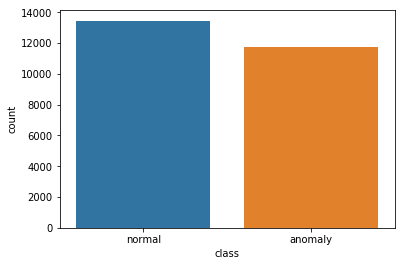

In [12]:
sns.countplot(all['class'])

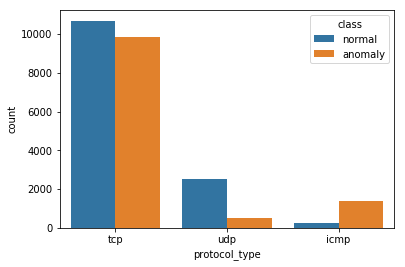

In [13]:
sns.countplot("protocol_type",hue="class",data=all)
# what does this tell us?
# this protocol type important is important or not?
#yes esp udp and icmp as most of them are normal & anamaly repectively

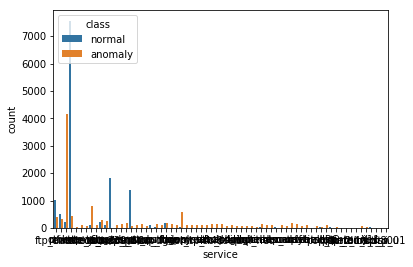

In [14]:
sns.countplot("service",hue="class",data=all)

In [15]:
all['service'].value_counts()

http           15856
private         9125
domain_u        2714
smtp            2383
ftp_data        2247
telnet          2109
other           1696
ecr_i           1365
eco_i           1171
pop_3           1072
ftp             1037
finger           502
imap4            444
auth             256
sunrpc           226
Z39_50           217
uucp             207
courier          204
bgp              192
time             191
whois            185
iso_tsap         179
uucp_path        179
ctf              168
nnsp             165
domain           160
vmnet            150
http_443         149
urp_i            147
csnet_ns         145
               ...  
mtp              122
systat           120
hostnames        119
exec             118
klogin           113
netbios_ns       112
netbios_dgm      110
ldap             109
login            108
netstat          104
echo             102
kshell            91
ssh               84
nntp              82
netbios_ssn       82
sql_net           64
IRC          

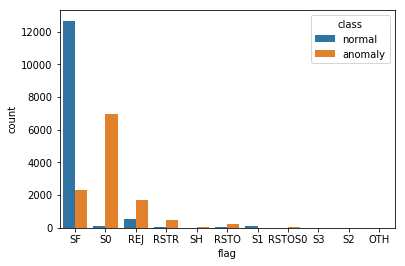

In [16]:
sns.countplot("flag",hue="class",data=all)

In [17]:
all['flag'].value_counts()

SF        29848
S0         9022
REJ        6066
RSTR       1166
RSTO       1077
S3          264
SH          116
S1          109
S2           36
RSTOS0       23
OTH           9
Name: flag, dtype: int64

# Run Normal decision tree using all variable.

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
# convert the categorical variables to dummy variables
dum1=pd.get_dummies(all['flag'],drop_first=True)
dum2=pd.get_dummies(all['service'],drop_first=True)
dum3=pd.get_dummies(all['protocol_type'],drop_first=True)
#add all the dummy variable to the original data frame
df_new=pd.concat([all,dum1,dum2,dum3],axis=1)

In [90]:
#split data back into the same train and test

In [21]:
train_new=df_new.head(len(nettrain))
test_new=df_new.tail(len(nettest))

In [22]:
X_train=train_new.drop(['class','service','flag','protocol_type'],axis=1)
y_train=train_new['class']
X_test=test_new.drop(['class','service','flag','protocol_type'],axis=1)
y_test=test_new['class']

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction and Evaluation

In [24]:
predictions = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

ValueError: Mix type of y not allowed, got types set(['unknown', 'binary'])

In [27]:
print(confusion_matrix(y_test,predictions))

ValueError: Classification metrics can't handle a mix of unknown and binary targets

# Tree Visualization¶

In [124]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [118]:
features = list(train.columns[0:-1])

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [132]:
from sklearn import tree
tree.export_graphviz(dtree,out_file='tree.dot')   

# Random Forests

In [150]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,mx_features=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [151]:
rfc_pred = rfc.predict(X_test)

In [152]:
print(confusion_matrix(y_test,rfc_pred))

[[8183 4650]
 [ 257 9454]]


In [153]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    anomaly       0.97      0.64      0.77     12833
     normal       0.67      0.97      0.79      9711

avg / total       0.84      0.78      0.78     22544



In [165]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

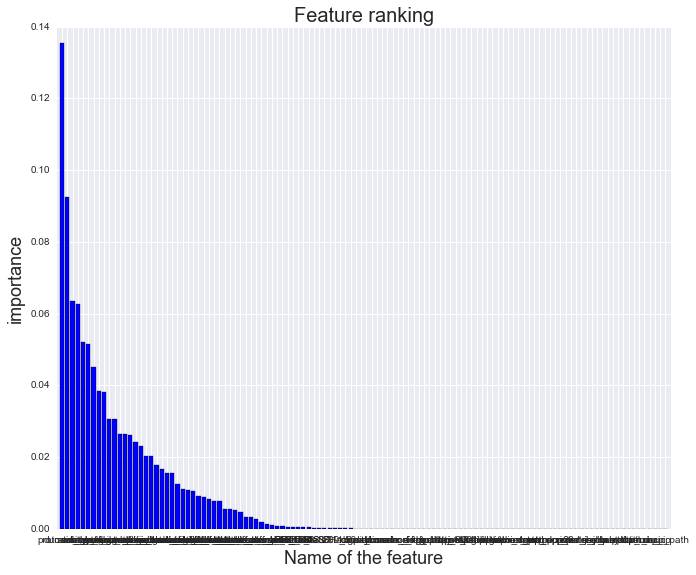

In [177]:
feature_names = train_new.columns # e.g. ['A', 'B', 'C', 'D', 'E']

f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X_train.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("Name of the feature", fontsize = 18)

In [183]:
train.columns

Index([u'duration', u'protocol_type', u'service', u'flag', u'src_bytes',
       u'dst_bytes', u'land', u'wrong_fragment', u'urgent', u'hot',
       u'num_failed_logins', u'logged_in', u'num_compromised', u'root_shell',
       u'su_attempted', u'num_root', u'num_file_creations', u'num_shells',
       u'num_access_files', u'num_outbound_cmds', u'is_host_login',
       u'is_guest_login', u'count', u'srv_count', u'serror_rate',
       u'srv_serror_rate', u'rerror_rate', u'srv_rerror_rate',
       u'same_srv_rate', u'diff_srv_rate', u'srv_diff_host_rate',
       u'dst_host_count', u'dst_host_srv_count', u'dst_host_same_srv_rate',
       u'dst_host_diff_srv_rate', u'dst_host_same_src_port_rate',
       u'dst_host_srv_diff_host_rate', u'dst_host_serror_rate',
       u'dst_host_srv_serror_rate', u'dst_host_rerror_rate',
       u'dst_host_srv_rerror_rate', u'class'],
      dtype='object')

In [197]:
pd.crosstab(train['land'],train['class'], margins=False) #not important

class,anomaly,normal
land,,
0,11742,13448
1,1,1


In [191]:
pd.crosstab(train['duration']<50,train['class'], margins=False)
# not important

class,anomaly,normal
duration,,
False,248,505
True,11495,12944


In [192]:
pd.crosstab(train['src_bytes']<50,train['class'], margins=False)
# important

class,anomaly,normal
src_bytes,,
False,1023,10587
True,10720,2862
